# Iris Species Analysis with Grouping & Aggregation in Pandas

### Grouping & Aggregation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Iris dataset.
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df1=df.copy()
df.shape

(150, 5)

In [4]:
# Group by species and find the mean of each numeric column.

df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
# Group by species and find the max of each numeric column.
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [6]:
# Group by species and get the count of rows.

df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
# Get the standard deviation of petal_length for each species.

df.groupby('species')['petal_length'].std()

species
setosa        0.173664
versicolor    0.469911
virginica     0.551895
Name: petal_length, dtype: float64

In [8]:
# Create a DataFrame showing only the mean sepal_length by species.
df.groupby('species')[['sepal_length']].mean()

,sepal_length
species,
setosa,5.006
versicolor,5.936
virginica,6.588


In [9]:
# Create a summary table using .agg() to show mean, min, max for all columns grouped by species.

df.groupby('species').agg(['mean','min','max'])

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.246  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

In [10]:
# Use describe() after grouping by species.

df.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [11]:
# Sort the groups by average sepal_width.
df.groupby('species')['sepal_width'].mean().sort_values()



species
versicolor    2.770
virginica     2.974
setosa        3.428
Name: sepal_width, dtype: float64

In [12]:
# Get the species with the highest average petal_width.

df.groupby('species')['petal_width'].mean().idxmax()

'virginica'

###  MultiIndex & Reshaping

In [13]:

# Create a pivot table with species as index, and mean of each measurement as values.
pivottab=df.pivot_table(index='species',aggfunc='mean')

pivottab

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [14]:
# stack the pivoted DataFrame.

stck=pivottab.stack()
stck

species                 
setosa      petal_length    1.462
            petal_width     0.246
            sepal_length    5.006
            sepal_width     3.428
versicolor  petal_length    4.260
            petal_width     1.326
            sepal_length    5.936
            sepal_width     2.770
virginica   petal_length    5.552
            petal_width     2.026
            sepal_length    6.588
            sepal_width     2.974
dtype: float64

In [15]:
# Unstack the stacked DataFrame.
stck.unstack()



,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [16]:
# Use .melt() to unpivot the DataFrame.

melted=df.melt(id_vars='species')
melted.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [17]:
# Rename columns during melt: make 'variable' to 'Feature', and 'value' to 'Measurement'.

melted_renamed = df.melt(id_vars='species', var_name='Feature', value_name='Measurement')
melted_renamed.head()



,species,Feature,Measurement
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [18]:
# Create a MultiIndex from species and bin of sepal_length.

df['sepal_bin']=pd.cut(df['sepal_length'],bins=3)

mul_index=df.set_index(['species','sepal_bin'])
mul_index.head()

sepal_length  sepal_width  petal_length  petal_width
species sepal_bin                                                         
setosa  (4.296, 5.5]           5.1          3.5           1.4          0.2
        (4.296, 5.5]           4.9          3.0           1.4          0.2
        (4.296, 5.5]           4.7          3.2           1.3          0.2
        (4.296, 5.5]           4.6          3.1           1.5          0.2
        (4.296, 5.5]           5.0          3.6           1.4          0.2

In [19]:
# Use .reset_index() to flatten a MultiIndex.

mul_index.reset_index().head()

,species,sepal_bin,sepal_length,sepal_width,petal_length,petal_width
0,setosa,"(4.296, 5.5]",5.1,3.5,1.4,0.2
1,setosa,"(4.296, 5.5]",4.9,3.0,1.4,0.2
2,setosa,"(4.296, 5.5]",4.7,3.2,1.3,0.2
3,setosa,"(4.296, 5.5]",4.6,3.1,1.5,0.2
4,setosa,"(4.296, 5.5]",5.0,3.6,1.4,0.2


In [20]:
# Use .set_index() to set species and sepal_width as the index.
indexed = df.set_index(['species', 'sepal_width'])
indexed.head()


sepal_length  petal_length  petal_width     sepal_bin
species sepal_width                                                       
setosa  3.5                   5.1           1.4          0.2  (4.296, 5.5]
        3.0                   4.9           1.4          0.2  (4.296, 5.5]
        3.2                   4.7           1.3          0.2  (4.296, 5.5]
        3.1                   4.6           1.5          0.2  (4.296, 5.5]
        3.6                   5.0           1.4          0.2  (4.296, 5.5]

In [21]:
# Swap the levels of a MultiIndex.

swapped=mul_index.swaplevel()

swapped.head()

sepal_length  sepal_width  petal_length  petal_width
sepal_bin    species                                                      
(4.296, 5.5] setosa            5.1          3.5           1.4          0.2
             setosa            4.9          3.0           1.4          0.2
             setosa            4.7          3.2           1.3          0.2
             setosa            4.6          3.1           1.5          0.2
             setosa            5.0          3.6           1.4          0.2

In [22]:
# Sort the MultiIndex.
sorted_multi = mul_index.sort_index()
sorted_multi.head()

sepal_length  sepal_width  petal_length  petal_width
species sepal_bin                                                         
setosa  (4.296, 5.5]           5.1          3.5           1.4          0.2
        (4.296, 5.5]           4.9          3.0           1.4          0.2
        (4.296, 5.5]           4.7          3.2           1.3          0.2
        (4.296, 5.5]           4.6          3.1           1.5          0.2
        (4.296, 5.5]           5.0          3.6           1.4          0.2

### Advanced Filtering

In [23]:
# Filter rows where sepal_length > 5 and petal_length < 2.

df[(df['sepal_length']> 5) & (df['petal_length'] < 2)] 

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin
0,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]"
5,5.4,3.9,1.7,0.4,setosa,"(4.296, 5.5]"
10,5.4,3.7,1.5,0.2,setosa,"(4.296, 5.5]"
14,5.8,4.0,1.2,0.2,setosa,"(5.5, 6.7]"
15,5.7,4.4,1.5,0.4,setosa,"(5.5, 6.7]"
16,5.4,3.9,1.3,0.4,setosa,"(4.296, 5.5]"
17,5.1,3.5,1.4,0.3,setosa,"(4.296, 5.5]"
18,5.7,3.8,1.7,0.3,setosa,"(5.5, 6.7]"
19,5.1,3.8,1.5,0.3,setosa,"(4.296, 5.5]"
20,5.4,3.4,1.7,0.2,setosa,"(4.296, 5.5]"


In [24]:
# Filter for species "setosa" with petal_width > 0.2.

df[(df['species'] == 'setosa') & (df['petal_width'] > 0.2)]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin
5,5.4,3.9,1.7,0.4,setosa,"(4.296, 5.5]"
6,4.6,3.4,1.4,0.3,setosa,"(4.296, 5.5]"
15,5.7,4.4,1.5,0.4,setosa,"(5.5, 6.7]"
16,5.4,3.9,1.3,0.4,setosa,"(4.296, 5.5]"
17,5.1,3.5,1.4,0.3,setosa,"(4.296, 5.5]"
18,5.7,3.8,1.7,0.3,setosa,"(5.5, 6.7]"
19,5.1,3.8,1.5,0.3,setosa,"(4.296, 5.5]"
21,5.1,3.7,1.5,0.4,setosa,"(4.296, 5.5]"
23,5.1,3.3,1.7,0.5,setosa,"(4.296, 5.5]"
26,5.0,3.4,1.6,0.4,setosa,"(4.296, 5.5]"


In [25]:
# Select rows where species is not "virginica".

df[df['species']!='virginica']

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin
0,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]"
1,4.9,3.0,1.4,0.2,setosa,"(4.296, 5.5]"
2,4.7,3.2,1.3,0.2,setosa,"(4.296, 5.5]"
3,4.6,3.1,1.5,0.2,setosa,"(4.296, 5.5]"
4,5.0,3.6,1.4,0.2,setosa,"(4.296, 5.5]"
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,"(5.5, 6.7]"
96,5.7,2.9,4.2,1.3,versicolor,"(5.5, 6.7]"
97,6.2,2.9,4.3,1.3,versicolor,"(5.5, 6.7]"
98,5.1,2.5,3.0,1.1,versicolor,"(4.296, 5.5]"


In [26]:
# Use .query() to filter rows where sepal_width > 3.

df.query('sepal_width > 3')

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin
0,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]"
2,4.7,3.2,1.3,0.2,setosa,"(4.296, 5.5]"
3,4.6,3.1,1.5,0.2,setosa,"(4.296, 5.5]"
4,5.0,3.6,1.4,0.2,setosa,"(4.296, 5.5]"
5,5.4,3.9,1.7,0.4,setosa,"(4.296, 5.5]"
...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica,"(5.5, 6.7]"
141,6.9,3.1,5.1,2.3,virginica,"(6.7, 7.9]"
143,6.8,3.2,5.9,2.3,virginica,"(6.7, 7.9]"
144,6.7,3.3,5.7,2.5,virginica,"(5.5, 6.7]"


In [27]:
# Filter rows where any column value is greater than 6.

df[df.iloc[:,:4].gt(6).any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin
50,7.0,3.2,4.7,1.4,versicolor,"(6.7, 7.9]"
51,6.4,3.2,4.5,1.5,versicolor,"(5.5, 6.7]"
52,6.9,3.1,4.9,1.5,versicolor,"(6.7, 7.9]"
54,6.5,2.8,4.6,1.5,versicolor,"(5.5, 6.7]"
56,6.3,3.3,4.7,1.6,versicolor,"(5.5, 6.7]"
...,...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica,"(5.5, 6.7]"
145,6.7,3.0,5.2,2.3,virginica,"(5.5, 6.7]"
146,6.3,2.5,5.0,1.9,virginica,"(5.5, 6.7]"
147,6.5,3.0,5.2,2.0,virginica,"(5.5, 6.7]"


### Conditional Column Creation

In [28]:
# Create a column SepalRatio = sepal_length / sepal_width.

df['SepalRatio']=df['sepal_length'] / df['sepal_width']
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio
94,5.6,2.7,4.2,1.3,versicolor,"(5.5, 6.7]",2.074074
80,5.5,2.4,3.8,1.1,versicolor,"(4.296, 5.5]",2.291667
79,5.7,2.6,3.5,1.0,versicolor,"(5.5, 6.7]",2.192308


In [29]:
# Create a column PetalCategory: 'Short' if petal_length < 3 else 'Long'.

df['PetalCategory']=np.where(df['petal_length']<3,'Short','Long')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory
6,4.6,3.4,1.4,0.3,setosa,"(4.296, 5.5]",1.352941,Short
83,6.0,2.7,5.1,1.6,versicolor,"(5.5, 6.7]",2.222222,Long
131,7.9,3.8,6.4,2.0,virginica,"(6.7, 7.9]",2.078947,Long
143,6.8,3.2,5.9,2.3,virginica,"(6.7, 7.9]",2.125000,Long
133,6.3,2.8,5.1,1.5,virginica,"(5.5, 6.7]",2.250000,Long


In [30]:
# Create a column IsWideSepal: True if sepal_width > 3.5.

df['IsWideSepal'] = df['sepal_width'] > 3.5
df.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory,IsWideSepal
89,5.5,2.5,4.0,1.3,versicolor,"(4.296, 5.5]",2.200000,Long,False
136,6.3,3.4,5.6,2.4,virginica,"(5.5, 6.7]",1.852941,Long,False
12,4.8,3.0,1.4,0.1,setosa,"(4.296, 5.5]",1.600000,Short,False
93,5.0,2.3,3.3,1.0,versicolor,"(4.296, 5.5]",2.173913,Long,False
71,6.1,2.8,4.0,1.3,versicolor,"(5.5, 6.7]",2.178571,Long,False


In [31]:
# Create a column SizeFlag using np.where based on petal_length > 4.

df['SizeFlag'] = np.where(df['petal_length'] > 4, 'Large', 'Small')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory,IsWideSepal,SizeFlag
9,4.9,3.1,1.5,0.1,setosa,"(4.296, 5.5]",1.580645,Short,False,Small
18,5.7,3.8,1.7,0.3,setosa,"(5.5, 6.7]",1.500000,Short,True,Small
27,5.2,3.5,1.5,0.2,setosa,"(4.296, 5.5]",1.485714,Short,False,Small
68,6.2,2.2,4.5,1.5,versicolor,"(5.5, 6.7]",2.818182,Long,False,Large
47,4.6,3.2,1.4,0.2,setosa,"(4.296, 5.5]",1.437500,Short,False,Small


In [32]:
# Create a column combining species and petal length using .apply().
df['SpeciesLengthTag'] = df.apply(lambda row: f"{row['species']}_{row['petal_length']}", axis=1)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory,IsWideSepal,SizeFlag,SpeciesLengthTag
18,5.7,3.8,1.7,0.3,setosa,"(5.5, 6.7]",1.500000,Short,True,Small,setosa_1.7
95,5.7,3.0,4.2,1.2,versicolor,"(5.5, 6.7]",1.900000,Long,False,Large,versicolor_4.2
10,5.4,3.7,1.5,0.2,setosa,"(4.296, 5.5]",1.459459,Short,True,Small,setosa_1.5
91,6.1,3.0,4.6,1.4,versicolor,"(5.5, 6.7]",2.033333,Long,False,Large,versicolor_4.6
5,5.4,3.9,1.7,0.4,setosa,"(4.296, 5.5]",1.384615,Short,True,Small,setosa_1.7


### Ranking & Binning

In [33]:
# Rank each row by sepal_length.
df['SepalLengthRank'] = df['sepal_length'].rank()
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory,IsWideSepal,SizeFlag,SpeciesLengthTag,SepalLengthRank
43,5.0,3.5,1.6,0.6,setosa,"(4.296, 5.5]",1.428571,Short,False,Small,setosa_1.6,27.5
81,5.5,2.4,3.7,1.0,versicolor,"(4.296, 5.5]",2.291667,Long,False,Small,versicolor_3.7,56.0
116,6.5,3.0,5.5,1.8,virginica,"(5.5, 6.7]",2.166667,Long,False,Large,virginica_5.5,118.0


In [34]:
# Bin sepal_length into 3 equal-sized bins.

df['SepalLengthBin'] = pd.qcut(df['sepal_length'], 3)


In [35]:
# Bin petal_length into custom intervals: [0, 2, 4, 6].

df['PetalLengthBin'] = pd.cut(df['petal_length'], bins=[0, 2, 4, 6])

In [36]:
# Add labels to the bins created above: ['Short', 'Medium', 'Long'].
df['PetalLengthBinLabeled'] = pd.cut(df['petal_length'], bins=[0, 2, 4, 6], labels=['Short', 'Medium', 'Long'])

df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_bin,SepalRatio,PetalCategory,IsWideSepal,SizeFlag,SpeciesLengthTag,SepalLengthRank,SepalLengthBin,PetalLengthBin,PetalLengthBinLabeled
114,5.8,2.8,5.1,2.4,virginica,"(5.5, 6.7]",2.071429,Long,False,Large,virginica_5.1,77.0,"(5.4, 6.3]","(4, 6]",Long
138,6.0,3.0,4.8,1.8,virginica,"(5.5, 6.7]",2.000000,Long,False,Large,virginica_4.8,86.5,"(5.4, 6.3]","(4, 6]",Long
55,5.7,2.8,4.5,1.3,versicolor,"(5.5, 6.7]",2.035714,Long,False,Large,versicolor_4.5,69.5,"(5.4, 6.3]","(4, 6]",Long
86,6.7,3.1,4.7,1.5,versicolor,"(5.5, 6.7]",2.161290,Long,False,Large,versicolor_4.7,126.5,"(6.3, 7.9]","(4, 6]",Long
56,6.3,3.3,4.7,1.6,versicolor,"(5.5, 6.7]",1.909091,Long,False,Large,versicolor_4.7,104.0,"(5.4, 6.3]","(4, 6]",Long


In [37]:
# Find which bin has the most entries for petal length.

df['PetalLengthBinLabeled'].value_counts().idxmax()

'Long'

###  Value Counts & Frequencies

In [38]:
# Count how many rows each species has.
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [39]:
# Use .value_counts() on binned sepal_length.

df['SepalLengthBin'].value_counts()

SepalLengthBin
(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: count, dtype: int64

In [40]:
# Get frequency of combinations using .groupby(['species', bin]).
df.groupby(['species', 'PetalLengthBinLabeled']).size()

C:\Users\hp\AppData\Local\Temp\ipykernel_4704\1980272504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['species', 'PetalLengthBinLabeled']).size()


species     PetalLengthBinLabeled
setosa      Short                    50
            Medium                    0
            Long                      0
versicolor  Short                     0
            Medium                   16
            Long                     34
virginica   Short                     0
            Medium                    0
            Long                     41
dtype: int64

In [41]:
# Use .crosstab() between species and petal length bins.
pd.crosstab(df['species'], df['PetalLengthBinLabeled'])


PetalLengthBinLabeled,Short,Medium,Long
species,,,
setosa,50,0,0
versicolor,0,16,34
virginica,0,0,41


In [42]:
# Normalize .value_counts() to get proportions.
df['PetalLengthBinLabeled'].value_counts(normalize=True)

PetalLengthBinLabeled
Long      0.531915
Short     0.354610
Medium    0.113475
Name: proportion, dtype: float64

### Column & Index Management

In [43]:

# Rename all columns to Title Case.

df.columns=[col.title() for col in df.columns]
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species',
       'Sepal_Bin', 'Sepalratio', 'Petalcategory', 'Iswidesepal', 'Sizeflag',
       'Specieslengthtag', 'Sepallengthrank', 'Sepallengthbin',
       'Petallengthbin', 'Petallengthbinlabeled'],
      dtype='object')

In [44]:
# Add prefix "Iris_" to all column names.

df.columns=['Iris_'+col for col in df.columns]
df.columns

Index(['Iris_Sepal_Length', 'Iris_Sepal_Width', 'Iris_Petal_Length',
       'Iris_Petal_Width', 'Iris_Species', 'Iris_Sepal_Bin', 'Iris_Sepalratio',
       'Iris_Petalcategory', 'Iris_Iswidesepal', 'Iris_Sizeflag',
       'Iris_Specieslengthtag', 'Iris_Sepallengthrank', 'Iris_Sepallengthbin',
       'Iris_Petallengthbin', 'Iris_Petallengthbinlabeled'],
      dtype='object')

In [45]:
# Remove the prefix again.

df.columns=[col.replace("Iris_",'') for col in df.columns]
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species',
       'Sepal_Bin', 'Sepalratio', 'Petalcategory', 'Iswidesepal', 'Sizeflag',
       'Specieslengthtag', 'Sepallengthrank', 'Sepallengthbin',
       'Petallengthbin', 'Petallengthbinlabeled'],
      dtype='object')

In [46]:
# Change index to start from 100 instead of 0.

df.index=range(100, 100+len (df)) 
df.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled
100,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]",1.457143,Short,False,Small,setosa_1.4,37.0,"(4.2989999999999995, 5.4]","(0, 2]",Short
101,4.9,3.0,1.4,0.2,setosa,"(4.296, 5.5]",1.633333,Short,False,Small,setosa_1.4,19.5,"(4.2989999999999995, 5.4]","(0, 2]",Short
102,4.7,3.2,1.3,0.2,setosa,"(4.296, 5.5]",1.468750,Short,False,Small,setosa_1.3,10.5,"(4.2989999999999995, 5.4]","(0, 2]",Short
103,4.6,3.1,1.5,0.2,setosa,"(4.296, 5.5]",1.483871,Short,False,Small,setosa_1.5,7.5,"(4.2989999999999995, 5.4]","(0, 2]",Short
104,5.0,3.6,1.4,0.2,setosa,"(4.296, 5.5]",1.388889,Short,True,Small,setosa_1.4,27.5,"(4.2989999999999995, 5.4]","(0, 2]",Short


In [47]:
# Add a new column 'id' with unique identifier using range.
df['id'] = range(1, len(df) + 1)
df.tail(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled,id
245,6.7,3.0,5.2,2.3,virginica,"(5.5, 6.7]",2.233333,Long,False,Large,virginica_5.2,126.5,"(6.3, 7.9]","(4, 6]",Long,146
246,6.3,2.5,5.0,1.9,virginica,"(5.5, 6.7]",2.520000,Long,False,Large,virginica_5.0,104.0,"(5.4, 6.3]","(4, 6]",Long,147
247,6.5,3.0,5.2,2.0,virginica,"(5.5, 6.7]",2.166667,Long,False,Large,virginica_5.2,118.0,"(6.3, 7.9]","(4, 6]",Long,148
248,6.2,3.4,5.4,2.3,virginica,"(5.5, 6.7]",1.823529,Long,False,Large,virginica_5.4,97.5,"(5.4, 6.3]","(4, 6]",Long,149
249,5.9,3.0,5.1,1.8,virginica,"(5.5, 6.7]",1.966667,Long,False,Large,virginica_5.1,82.0,"(5.4, 6.3]","(4, 6]",Long,150


### Sorting, Sampling, Shuffling

In [48]:
# Sort rows by sepal_length descending.
df_sorted=df.sort_values(by='Sepal_Length',ascending=False)
df_sorted

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled,id
231,7.9,3.8,6.4,2.0,virginica,"(6.7, 7.9]",2.078947,Long,True,Large,virginica_6.4,150.0,"(6.3, 7.9]",NaN,NaN,132
235,7.7,3.0,6.1,2.3,virginica,"(6.7, 7.9]",2.566667,Long,False,Large,virginica_6.1,147.5,"(6.3, 7.9]",NaN,NaN,136
222,7.7,2.8,6.7,2.0,virginica,"(6.7, 7.9]",2.750000,Long,False,Large,virginica_6.7,147.5,"(6.3, 7.9]",NaN,NaN,123
217,7.7,3.8,6.7,2.2,virginica,"(6.7, 7.9]",2.026316,Long,True,Large,virginica_6.7,147.5,"(6.3, 7.9]",NaN,NaN,118
218,7.7,2.6,6.9,2.3,virginica,"(6.7, 7.9]",2.961538,Long,False,Large,virginica_6.9,147.5,"(6.3, 7.9]",NaN,NaN,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4.5,2.3,1.3,0.3,setosa,"(4.296, 5.5]",1.956522,Short,False,Small,setosa_1.3,5.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,42
142,4.4,3.2,1.3,0.2,setosa,"(4.296, 5.5]",1.375000,Short,False,Small,setosa_1.3,3.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,43
138,4.4,3.0,1.3,0.2,setosa,"(4.296, 5.5]",1.466667,Short,False,Small,setosa_1.3,3.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,39
108,4.4,2.9,1.4,0.2,setosa,"(4.296, 5.5]",1.517241,Short,False,Small,setosa_1.4,3.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,9


In [49]:
# Randomly sample 10 rows.
sample_10_rows = df.sample(10)
sample_10_rows

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled,id
166,5.6,3.0,4.5,1.5,versicolor,"(5.5, 6.7]",1.866667,Long,False,Large,versicolor_4.5,62.5,"(5.4, 6.3]","(4.0, 6.0]",Long,67
145,4.8,3.0,1.4,0.3,setosa,"(4.296, 5.5]",1.600000,Short,False,Small,setosa_1.4,14.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,46
218,7.7,2.6,6.9,2.3,virginica,"(6.7, 7.9]",2.961538,Long,False,Large,virginica_6.9,147.5,"(6.3, 7.9]",NaN,NaN,119
165,6.7,3.1,4.4,1.4,versicolor,"(5.5, 6.7]",2.161290,Long,False,Large,versicolor_4.4,126.5,"(6.3, 7.9]","(4.0, 6.0]",Long,66
144,5.1,3.8,1.9,0.4,setosa,"(4.296, 5.5]",1.342105,Short,True,Small,setosa_1.9,37.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,45
143,5.0,3.5,1.6,0.6,setosa,"(4.296, 5.5]",1.428571,Short,False,Small,setosa_1.6,27.5,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,44
248,6.2,3.4,5.4,2.3,virginica,"(5.5, 6.7]",1.823529,Long,False,Large,virginica_5.4,97.5,"(5.4, 6.3]","(4.0, 6.0]",Long,149
226,6.2,2.8,4.8,1.8,virginica,"(5.5, 6.7]",2.214286,Long,False,Large,virginica_4.8,97.5,"(5.4, 6.3]","(4.0, 6.0]",Long,127
147,4.6,3.2,1.4,0.2,setosa,"(4.296, 5.5]",1.437500,Short,False,Small,setosa_1.4,7.5,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,48
155,5.7,2.8,4.5,1.3,versicolor,"(5.5, 6.7]",2.035714,Long,False,Large,versicolor_4.5,69.5,"(5.4, 6.3]","(4.0, 6.0]",Long,56


In [50]:
# Sample 10% of the data.
sample_10_percent = df.sample(frac=0.1, random_state=43)
sample_10_percent

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled,id
130,4.8,3.1,1.6,0.2,setosa,"(4.296, 5.5]",1.548387,Short,False,Small,setosa_1.6,14.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,31
100,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]",1.457143,Short,False,Small,setosa_1.4,37.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,1
238,6.0,3.0,4.8,1.8,virginica,"(5.5, 6.7]",2.000000,Long,False,Large,virginica_4.8,86.5,"(5.4, 6.3]","(4.0, 6.0]",Long,139
167,5.8,2.7,4.1,1.0,versicolor,"(5.5, 6.7]",2.148148,Long,False,Large,versicolor_4.1,77.0,"(5.4, 6.3]","(4.0, 6.0]",Long,68
205,7.6,3.0,6.6,2.1,virginica,"(6.7, 7.9]",2.533333,Long,False,Large,virginica_6.6,145.0,"(6.3, 7.9]",NaN,NaN,106
139,5.1,3.4,1.5,0.2,setosa,"(4.296, 5.5]",1.500000,Short,False,Small,setosa_1.5,37.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,40
213,5.7,2.5,5.0,2.0,virginica,"(5.5, 6.7]",2.280000,Long,False,Large,virginica_5.0,69.5,"(5.4, 6.3]","(4.0, 6.0]",Long,114
171,6.1,2.8,4.0,1.3,versicolor,"(5.5, 6.7]",2.178571,Long,False,Small,versicolor_4.0,92.5,"(5.4, 6.3]","(2.0, 4.0]",Medium,72
181,5.5,2.4,3.7,1.0,versicolor,"(4.296, 5.5]",2.291667,Long,False,Small,versicolor_3.7,56.0,"(5.4, 6.3]","(2.0, 4.0]",Medium,82
157,4.9,2.4,3.3,1.0,versicolor,"(4.296, 5.5]",2.041667,Long,False,Small,versicolor_3.3,19.5,"(4.2989999999999995, 5.4]","(2.0, 4.0]",Medium,58


In [51]:
# Shuffle the entire DataFrame.
df_shuffled = df.sample(frac=1, random_state=43).reset_index(drop=True)
df_shuffled

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Sepal_Bin,Sepalratio,Petalcategory,Iswidesepal,Sizeflag,Specieslengthtag,Sepallengthrank,Sepallengthbin,Petallengthbin,Petallengthbinlabeled,id
0,4.8,3.1,1.6,0.2,setosa,"(4.296, 5.5]",1.548387,Short,False,Small,setosa_1.6,14.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,31
1,5.1,3.5,1.4,0.2,setosa,"(4.296, 5.5]",1.457143,Short,False,Small,setosa_1.4,37.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,1
2,6.0,3.0,4.8,1.8,virginica,"(5.5, 6.7]",2.000000,Long,False,Large,virginica_4.8,86.5,"(5.4, 6.3]","(4.0, 6.0]",Long,139
3,5.8,2.7,4.1,1.0,versicolor,"(5.5, 6.7]",2.148148,Long,False,Large,versicolor_4.1,77.0,"(5.4, 6.3]","(4.0, 6.0]",Long,68
4,7.6,3.0,6.6,2.1,virginica,"(6.7, 7.9]",2.533333,Long,False,Large,virginica_6.6,145.0,"(6.3, 7.9]",NaN,NaN,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.6,2.9,4.6,1.3,versicolor,"(5.5, 6.7]",2.275862,Long,False,Large,versicolor_4.6,121.5,"(6.3, 7.9]","(4.0, 6.0]",Long,59
146,5.1,3.7,1.5,0.4,setosa,"(4.296, 5.5]",1.378378,Short,True,Small,setosa_1.5,37.0,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,22
147,5.0,3.3,1.4,0.2,setosa,"(4.296, 5.5]",1.515152,Short,False,Small,setosa_1.4,27.5,"(4.2989999999999995, 5.4]","(0.0, 2.0]",Short,50
148,5.6,2.9,3.6,1.3,versicolor,"(5.5, 6.7]",1.931034,Long,False,Small,versicolor_3.6,62.5,"(5.4, 6.3]","(2.0, 4.0]",Medium,65


In [52]:
# Find the 5 rows with the highest petal_length.

top_5_petal_length=df.nlargest(5,'Petal_Length')

## Visualization 

**Pair Plot** – Pairwise relationships between all features colored by species.

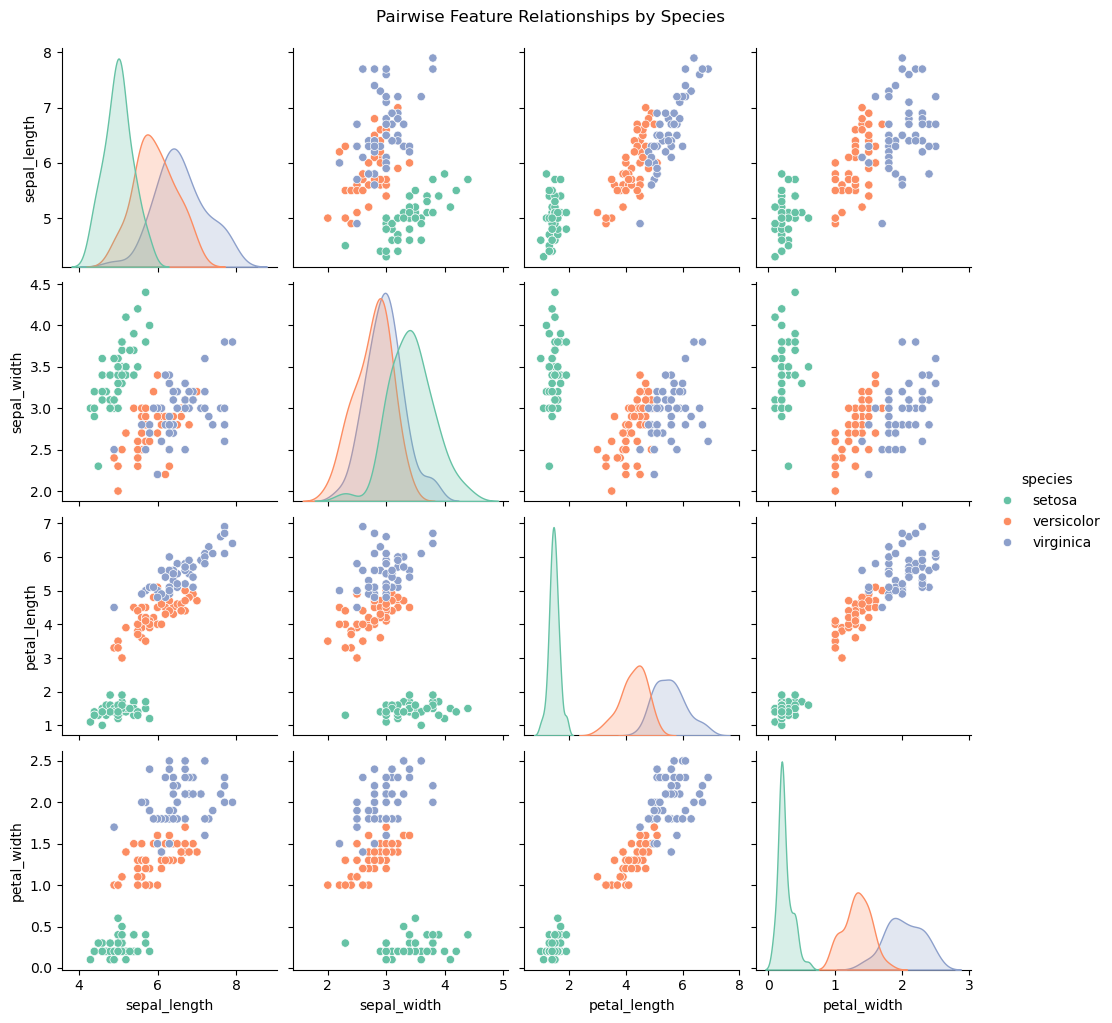

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df1, hue='species', palette='Set2')
plt.suptitle("Pairwise Feature Relationships by Species", y=1.02)
plt.show()
